<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/13-Support-Vector-Machines/00_My_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from svm_margin_plot import plot_svm_boundary

In [4]:
df = pd.read_csv('/content/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

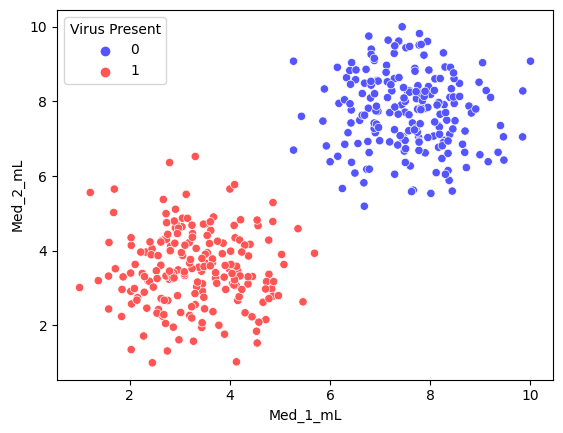

In [7]:
sns.scatterplot(df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present', palette='seismic')

In [42]:
# DATA SPLIT
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# SCALING
transforms = [('scaler', StandardScaler()), ('svm', SVC())]
pipe = Pipeline(transforms)
param_grid = {'svm__C':[0.01,0.1,1], 'svm__kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'svm__gamma':['scale', 'auto']}
grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=10, verbose=3)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 7/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 9/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear;, score=1.000 total time=   0.0s
[CV 10/10] END svm__C=0.01, svm__gamma=scale, svm__kernel=linear

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 1],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [43]:
grid.best_params_

{'svm__C': 0.01, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}

In [44]:
y_pred = grid.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

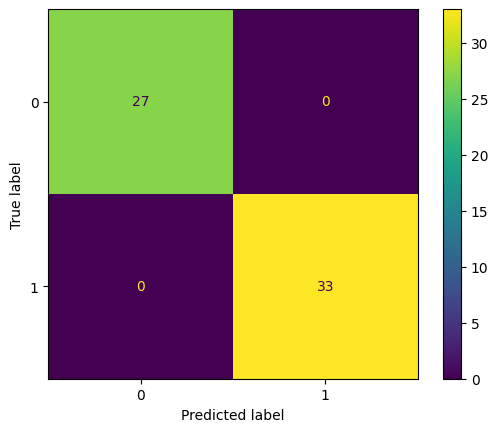

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        33

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


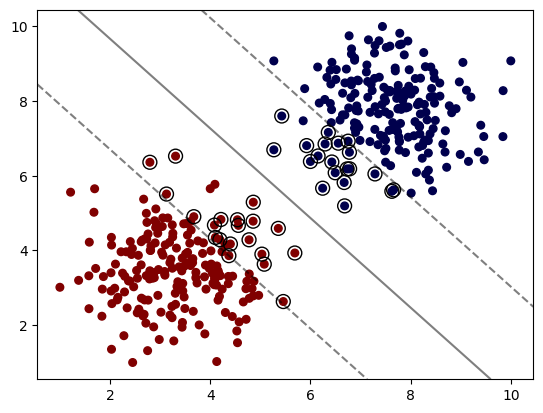

In [49]:
plot_svm_boundary(model, X, y)